# Generation of samples & test shoebox simulation

In this workbook, we will,
1. generate a matrix of storage vectors from the resstock sample output 
2. sample the manual parameters.
3. explore the distribution of data
4. generate shoeboxes from a small portion of the data
5. simulate the shoeboxes

### Setup and imports

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px
import seaborn as sns
sns.set(style="darkgrid")

# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

Initialize the schema

In [4]:
from schema import Schema, ShoeboxGeometryParameter, BuildingTemplateParameter, WhiteboxSimulation
schema = Schema()

c:\Users\zoele\anaconda3\envs\ml-for-bem\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Generate new design vectors


First, we will upload the raw outputs from the NREL ResStock sampling scheme.

In [5]:
from nrel_uitls import ResStockConfiguration

basepath = os.path.dirname(os.getcwd())
filepath = os.path.join(basepath, "NREL", "data", "ResStock", "resstock_filtered.csv")
citypath = os.path.join(basepath, "NREL", "data", "ResStock", "cities.csv")
resstock_filtered = pd.read_csv(filepath, index_col=0)
cities = pd.read_csv(citypath)
resstock_samples = ResStockConfiguration(resstock_filtered, cities)
sample_vector = resstock_samples.get_template_vector()
print(sample_vector[0])
print(sample_vector.shape)

Dropped 17 samples while cleaning. Now there are 591 samples.
[0.00000000e+00 3.00000000e+00 1.86000000e+03 0.00000000e+00
 0.00000000e+00 1.00000000e+00 1.50000000e-01 2.00000000e+01
 2.55555556e+01 1.00000000e+00 4.90000000e-04 1.85905269e-02
 4.05000000e+00 5.00340000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.12187390e-01 1.00000000e+00 3.81000000e-02
            nan 1.00000000e+00 3.81000000e-02 0.00000000e+00
 9.00000000e-01 1.00000000e+00 3.00000000e+00]
(591, 27)


Let's look at what parameters are described by ResStock

In [6]:
resstock_samples.columns

['bldg_id',
 'archetype',
 'vintage',
 'climate_zone',
 'base_epw',
 'window_type',
 'wwr',
 'heating_setpoint',
 'cooling_setpoint',
 'Infiltration',
 'dhw_flow',
 'PeopleDensity',
 'LightingPowerDensity',
 'EquipmentPowerDensity',
 't_floor_ins',
 'floor_mass',
 't_floor_mass',
 't_roof_ins',
 'roof_mass',
 't_roof_mass',
 't_wall_ins',
 'wall_mass',
 't_wall_mass',
 'has_electric_heating',
 'heating_cop',
 'has_cooling',
 'cooling_cop']

Some of these will directly match up with the schema parameters...

In [10]:
schema.parameter_names

['batch_id',
 'variation_id',
 'base_template_lib',
 'base_template',
 'base_epw',
 'width',
 'height',
 'facade_2_footprint',
 'perim_2_footprint',
 'roof_2_footprint',
 'footprint_2_ground',
 'shading_fact',
 'wwr',
 'orientation',
 'LightingPowerDensity',
 'EquipmentPowerDensity',
 'PeopleDensity',
 'Infiltration',
 'FacadeMass',
 'RoofMass',
 'PartitionMass',
 'SlabMass',
 'FacadeRValue',
 'RoofRValue',
 'PartitionRValue',
 'SlabRValue',
 'schedules_seed',
 'schedules']

In [ ]:
storage_vector = schema.generate_empty_storage_vector()

Text(0, 0.5, 'Heating')

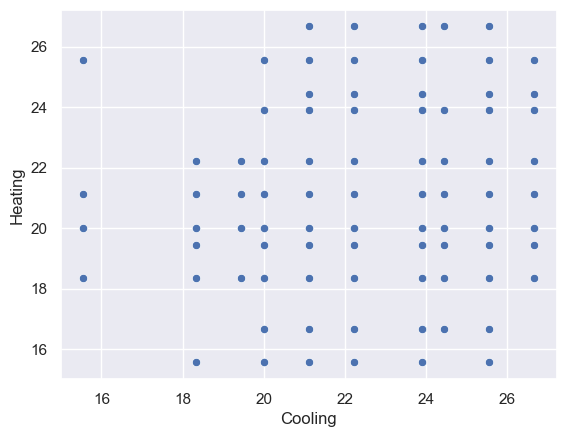

In [17]:
sns.scatterplot(
    x=sample_vector[:, resstock_samples.columns.index('cooling_setpoint')],
    y=sample_vector[:, resstock_samples.columns.index('heating_setpoint')])
plt.xlabel("Cooling")
plt.ylabel("Heating")

<Axes: ylabel='Count'>

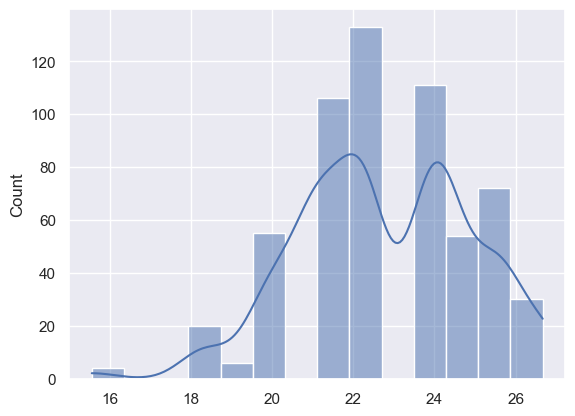

In [9]:
i = resstock_samples.columns.index('cooling_setpoint')
sns.histplot(sample_vector[:, i], kde=True)

<Axes: ylabel='Count'>

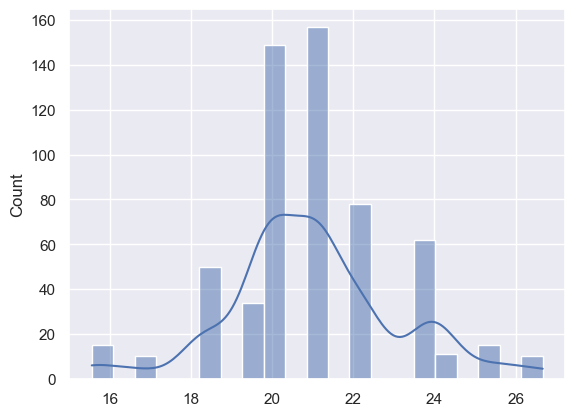

In [10]:
i = resstock_samples.columns.index('heating_setpoint')
sns.histplot(sample_vector[:, i], kde=True)

<Axes: ylabel='Count'>

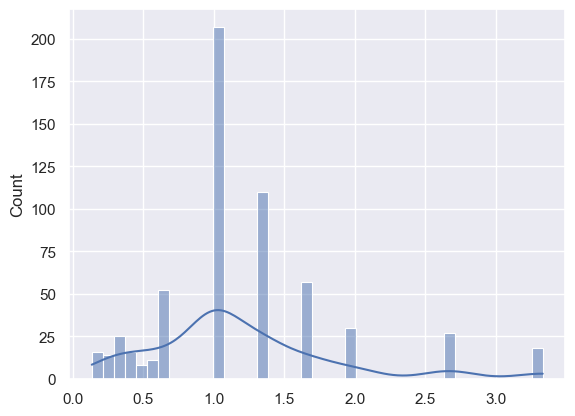

In [11]:
i = resstock_samples.columns.index('Infiltration')
sns.histplot(sample_vector[:, i], kde=True)

<Axes: ylabel='Count'>

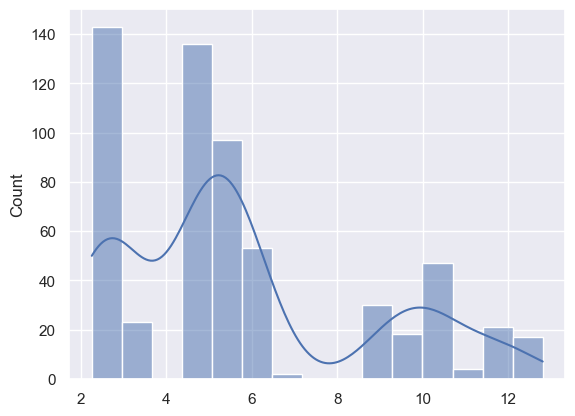

In [12]:
i = resstock_samples.columns.index('EquipmentPowerDensity')
sns.histplot(sample_vector[:, i], kde=True)

<Axes: ylabel='Count'>

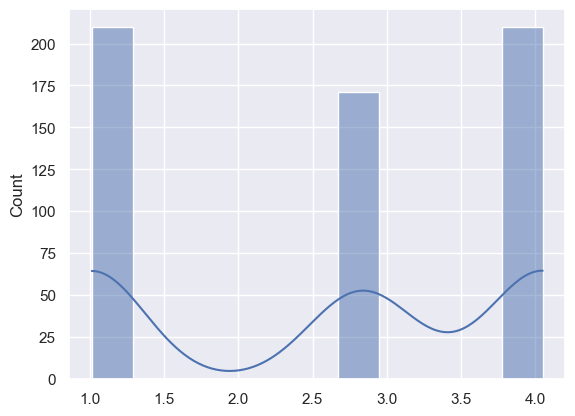

In [13]:
i = resstock_samples.columns.index('LightingPowerDensity')
sns.histplot(sample_vector[:, i], kde=True)

<Axes: ylabel='Count'>

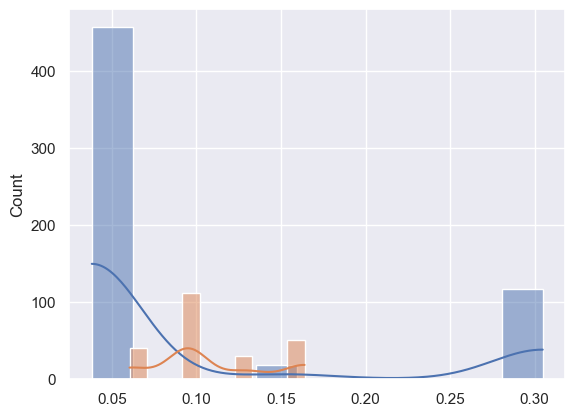

In [18]:
i = resstock_samples.columns.index('t_wall_mass')
j = resstock_samples.columns.index('t_wall_ins')
sns.histplot(sample_vector[:, i], kde=True)
sns.histplot(sample_vector[:, j], kde=True)